## Install missing package livelossplot

In [4]:
!pip install livelossplot

  Using cached https://files.pythonhosted.org/packages/8e/f6/0618c30078f9c1e4b2cd84f1ea6bb70c6615070468b75b0d934326107bcd/livelossplot-0.4.1-py3-none-any.whl


## Step 1: Reference required packages

In [5]:
import os, sys, math
import keras
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context("notebook", font_scale=1.4)
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from livelossplot import PlotLossesKeras
'exec(%matplotlib inline)'

'exec(%matplotlib inline)'

## Step 2: Data Load

In [6]:
#Data Load

data = pd.read_csv("C:/VT/Independent Study/ran_peps_netMHCpan40_predicted_A0201_reduced_cleaned_balanced.csv",
                   sep='\t')

x = data.drop(columns=["label_num", "data_type", "label_chr"])
y = data.drop(columns=["peptide", "label_chr", "data_type"])

#Inspect Data
print(x)
print(y)

         peptide
0      LLTDAQRIV
1      LMAFYLYEV
2      VMSPITLPT
3      SLHLTNCFV
4      RQFTCMIAV
5      HQRLAPTMP
6      FMNGHTHIA
7      KINPYFSGA
8      WLLIFHHCP
9      NIWLAIIEL
10     KIMPYVAQF
11     AIWERACTI
12     MRYRVSVHP
13     VLNGYSWFA
14     WIWGIQYLL
15     VILSFCQNK
16     SNKGTYMMR
17     DRNSMMHYG
18     SLTHVPCYV
19     LMWDMRTRM
20     NLWDATMKT
21     SMNNSHYMV
22     CDPHGYQIY
23     IIADHDYYM
24     PLNPSYIKV
25     MLPPWGACV
26     MPMMRAHGR
27     YIEEVTMEF
28     QLVAENEEV
29     LVMTEDMAI
...          ...
23730  ILKDDVMAC
23731  QMLITMFQV
23732  QWGDTQGRM
23733  KKNMVAYMD
23734  SMIYDARAL
23735  YIGVWKWMV
23736  SLFGGQMKM
23737  FIWRKNMVA
23738  PCMKAIMPK
23739  TLATVRNNV
23740  LSDYKCYEP
23741  IHSYRPITM
23742  YLVQPAHNA
23743  ALDCFFWFI
23744  KLSSWGCEL
23745  FEVVSIGFI
23746  EMQCMRKTA
23747  SMNWDQETI
23748  SQANGHIWQ
23749  TWCGGKQFI
23750  TINEHINTL
23751  LMWGSHVQL
23752  VLEWVNAMI
23753  FQDDQTMSM
23754  ITYWWSFYA
23755  ILRAFLSSL
23756  QTYDEIH

## Step 3: Peptide encoding

In [7]:
#Peptide encoding method

codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

def show_matrix(m):
          cm = sns.light_palette("seagreen", as_cmap=True)

def one_hot_encode(seq):
    o = list(set(codes) - set(seq))
    s = pd.DataFrame(list(seq))
    x = pd.DataFrame(np.zeros((len(seq),len(o)),dtype=int),columns=o)
    a = s[0].str.get_dummies(sep=',')
    a = a.join(x)
    a = a.sort_index(axis=1)
    e = a.values.flatten()
    return e

#Test the peptide encoding method
pep = 'LLTDAQRIV'
e = one_hot_encode(pep)
print(e)
print(len(e))
p = np.reshape(e, (20, 9, 1))
print(p)


[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
180
[[[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[1]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [1]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [1]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  

## Step 4: Encoding of all the peptides. create an object to hold loop results

In [8]:
# Encoding of all the peptides. create an object to hold loop results
print("length of x:" + str(len(x)))
x = x.values
print("x length after removing header: " + str(len(x)))
x_loop = []
for i in x:
    x_loop.append(one_hot_encode(str(i)[2:11]))

print("x_loop length: " + str(len(x_loop)))


length of x:23760
x length after removing header: 23760
x_loop length: 23760


In [9]:
#Reassign the values x is features and y is the output
x = x_loop
y = y

print(len(x))
print(len(y))

23760
23760


## Step 5: Train and test split with random state as 64 to create static split.

In [10]:
#Train and test split with random state as 64 to create static split.
x_train, x_test, y_train, y_test = train_test_split(x_loop, y, test_size=0.2, random_state=64)

print(len(y_test))
print(len(y_train))
print(len(x_test))
print(len(x_train))

#Reshape the training data to 9X20X1 for convolutional neural network
x_train_reshape = []
for j in x_train:
    x_train_reshape.append(np.reshape(j, (9, 20, 1)))

print("reshape count" + str(len(x_train_reshape)))
print(x_train_reshape[0])

#Reshape the test data to 9X20X1 for convolutional neural network
x_test_reshape = []
for k in x_test:
    x_test_reshape.append(np.reshape(k, (9, 20, 1)))


4752
19008
4752
19008
reshape count19008
[[[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [0]
  [1]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [

## Step 6: Converting categorical data to categorical

In [11]:
# Converting categorical data to categorical
num_categories = 3
y_train = keras.utils.to_categorical(y_train, num_categories)
y_test = keras.utils.to_categorical(y_test, num_categories)

In [12]:
# Model Building CNN (Convolutional Neural Network) using tensorflow and keras
num_filters = 8
filter_size = 3
pool_size = 2

modelcnn = keras.models.Sequential()
#Input
modelcnn.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(9, 20, 1)))
modelcnn.add(keras.layers.Dropout(0.25))
#Dense layer 1
modelcnn.add(keras.layers.Dense(180, activation='relu'))
modelcnn.add(keras.layers.Dropout(0.3))
#Dense layer 2
modelcnn.add(keras.layers.Dense(90, activation='relu'))
modelcnn.add(keras.layers.Dropout(0.3))
#Flatten of the input for the output layer
modelcnn.add(keras.layers.Flatten())
modelcnn.add(keras.layers.Dense(3, activation='softmax'))

# Compiling the model - adaDelta - Adaptive learning
modelcnn.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

#Print model summary
print(modelcnn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 7, 18, 32)         320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 18, 32)         0         
_________________________________________________________________
dense_1 (Dense)              (None, 7, 18, 180)        5940      
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 18, 180)        0         
_________________________________________________________________
dense_2 (Dense)              (None, 7, 18, 90)         16290     
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 18, 90)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 11340)            

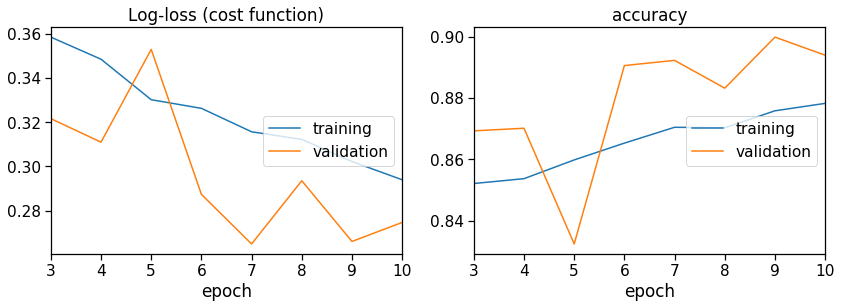

Log-loss (cost function):
training   (min:    0.294, max:    0.578, cur:    0.294)
validation (min:    0.265, max:    0.395, cur:    0.275)

accuracy:
training   (min:    0.736, max:    0.878, cur:    0.878)
validation (min:    0.832, max:    0.900, cur:    0.894)
4752/4752 [==============================] - 1s 183us/step
Train accuracy CNN: 0.9035668969154358
Test accuracy CNN: 0.8939393758773804


In [13]:
# Training and evaluating
batch_size = 50
num_epoch = 10
#Model fit
model_log = modelcnn.fit(np.array(x_train_reshape), np.array(y_train), batch_size=batch_size, epochs=num_epoch, verbose=1,
                         validation_data=(np.array(x_test_reshape), np.array(y_test)), callbacks=[PlotLossesKeras()])

#Train and Test score
train_score = modelcnn.evaluate(np.array(x_train_reshape), np.array(y_train), verbose=1)
test_score = modelcnn.evaluate(np.array(x_test_reshape), np.array(y_test), verbose=1)
print('Train accuracy CNN:', train_score[1])
print('Test accuracy CNN:', test_score[1])

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


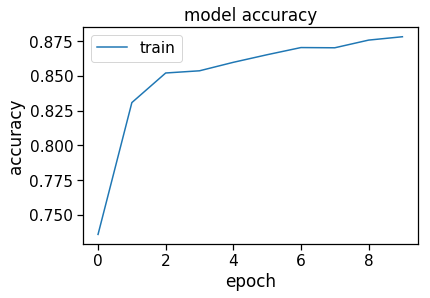

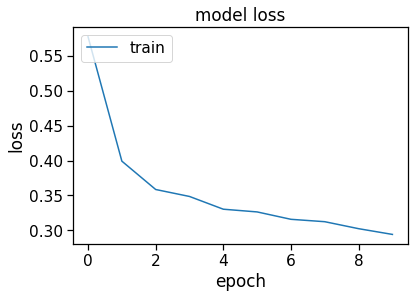

In [15]:
#Plotting of the model training history

# list all data in history
print(model_log.history.keys())
# summarize history for accuracy
plt.plot(model_log.history['accuracy'])
#plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_log.history['loss'])
#plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# Model Building ANN (Artificial Neural Network)
model = keras.models.Sequential()
model.add(keras.layers.Dense(180, activation="relu", input_shape=(180,)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(90, activation="relu"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(3, activation="softmax"))


# Compiling the model - adaDelta - Adaptive learning
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

#Print model summary
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 180)               32580     
_________________________________________________________________
dropout_4 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 90)                16290     
_________________________________________________________________
dropout_5 (Dropout)          (None, 90)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 273       
Total params: 49,143
Trainable params: 49,143
Non-trainable params: 0
_________________________________________________________________
None


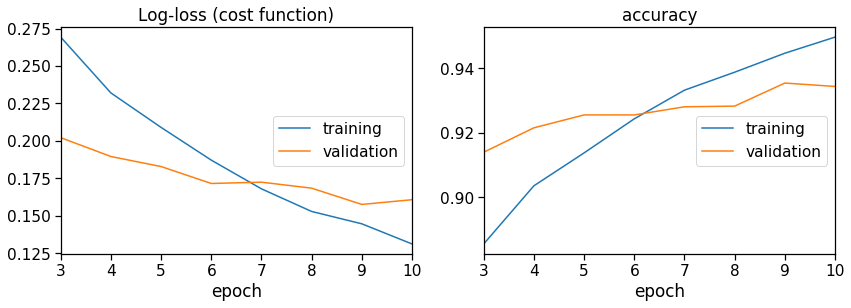

Log-loss (cost function):
training   (min:    0.131, max:    0.562, cur:    0.131)
validation (min:    0.158, max:    0.299, cur:    0.161)

accuracy:
training   (min:    0.734, max:    0.950, cur:    0.950)
validation (min:    0.879, max:    0.935, cur:    0.934)
4752/4752 [==============================] - 0s 18us/step
ANN Train accuracy: 0.9809027910232544
ANN Test accuracy: 0.9343434572219849


In [17]:
# Training and evaluating
batch_size = 50
num_epoch = 10

model_log_ann = model.fit(np.array(x_train), np.array(y_train),
                       batch_size=batch_size, epochs=num_epoch, verbose=1,
                          validation_data=(np.array(x_test), np.array(y_test)), callbacks=[PlotLossesKeras()])

train_score = model.evaluate(np.array(x_train), np.array(y_train), verbose=1)
test_score = model.evaluate(np.array(x_test), np.array(y_test), verbose=1)
print('ANN Train accuracy:', train_score[1])
print('ANN Test accuracy:', test_score[1])

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


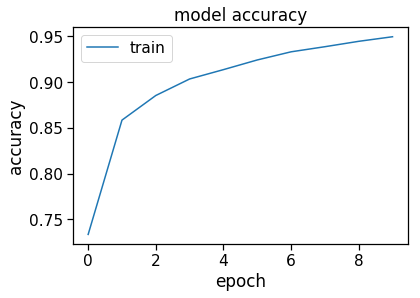

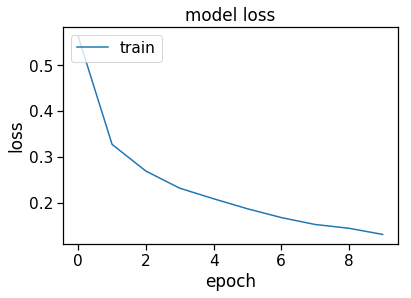

In [19]:
# list all data in history
print(model_log_ann.history.keys())
# summarize history for accuracy
plt.plot(model_log_ann.history['accuracy'])
#plt.plot(model_log_ann.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_log_ann.history['loss'])
#plt.plot(model_log_ann.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()